In [1]:
cd ../hirota/ALMA-SourceI/

/orange/adamginsburg/salt/hirota/ALMA-SourceI


In [2]:
%matplotlib inline
import pylab as pl

In [3]:
import regions
import glob
import spectral_cube.analysis_utilities
import reproject
from astropy import units as u
from astropy.io import fits
# mismatch coords vmap = fits.open('/orange/adamginsburg/orion/2016.1.00165.S/imaging/disk_velocity_map.fits')

In [4]:
ls

b8_saltdisk.crtf             band8_438G_spw2-subim.FITS
b8_saltdisk.reg              band8_438G_spw3-subim.FITS
band10_850G_spw0-subim.fits  band8_463G_spw0-subim.FITS
band10_850G_spw0-subim.FITS  band8_463G_spw1-subim.FITS
band10_850G_spw1-subim.fits  band8_463G_spw2-subim.FITS
band10_850G_spw1-subim.FITS  band8_463G_spw3-subim.FITS
band10_850G_spw3-subim.fits  band8_495G_spw0-subim.FITS
band10_850G_spw3-subim.FITS  band8_495G_spw1-subim.FITS
band8_438G_spw0-subim.FITS   band8_495G_spw2-subim.FITS
band8_438G_spw1-subim.FITS   spectra/


In [5]:
from spectral_cube import SpectralCube

In [6]:
if not os.path.exists('spectra'):
    os.mkdir('spectra')
if not os.path.exists('spectra/figures'):
    os.mkdir('spectra/figures')    

In [7]:
import glob

In [8]:
for fn in glob.glob('*band10*FITS'):
    print(fn)
    cube = SpectralCube.read(fn)
    cube.write(fn.replace("FITS","fits"), overwrite=True)

band10_850G_spw1-subim.FITS


band10_850G_spw3-subim.FITS


band10_850G_spw0-subim.FITS


In [9]:
cube = SpectralCube.read('band8_495G_spw2-subim.FITS')
cube

SpectralCube with shape=(1900, 129, 129) and unit=Jy / beam:
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -534041.246 m / s:  614511.991 m / s

In [10]:
from scipy import ndimage
from astropy import units as u

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in true_divide
  return (np.nansum(data * pix_cen, axis=axis) /


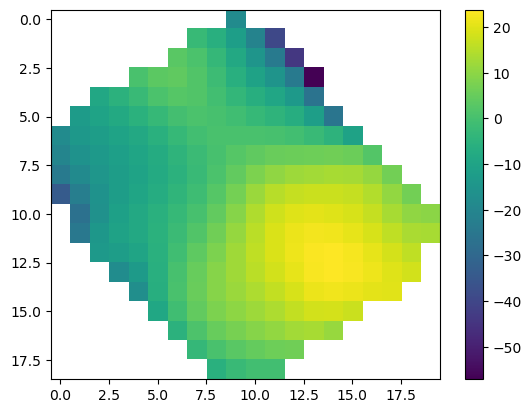

In [11]:
socube = SpectralCube.read('band8_438G_spw3-subim.FITS').with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=428.40578300*u.GHz).spectral_slab(-20*u.km/u.s, 35*u.km/u.s)
m0 = socube.moment0(axis=0)
msk = m0.value>0.73
msk = ndimage.binary_dilation(msk, iterations=1)
m1 = socube.with_mask(msk).minimal_subcube().moment1()
m1.quicklook()
pl.colorbar()
vmap = m1

## Failed attempt to use NaCl directly

```
cube = SpectralCube.read('band8_438G_spw3-subim.FITS').subcube_from_regions(regions.Regions.read('b8_saltdisk.reg')).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=428518.54700*u.MHz).spectral_slab(-20*u.km/u.s, 30*u.km/u.s)
m0 = cube.max(axis=0)
m0.quicklook();pl.colorbar()
msk = m0.value>0.05
#msk = ndimage.binary_dilation(msk, iterations=1)
pl.figure()
m1 = cube.with_mask(msk).with_mask((cube>0.00*cube.unit)).minimal_subcube().moment1()
#m1 = cube.moment1(axis=0)
m1.quicklook()
pl.colorbar()
vmap = m1
```

DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -488305.839 m / s:  142395.692 m / s


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -534041.246 m / s:  614511.991 m / s


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -636466.345 m / s:  665472.819 m / s


DaskSpectralCube with shape=(1899, 257, 257) and unit=Jy / beam and chunk size (508, 257, 257):
 n_x:    257  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    257  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1899  type_s: FREQ      unit_s: Hz     range: 839576623137.400 Hz:841430137813.400 Hz


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:   -89833.168 m / s:  543762.970 m / s


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -184148.193 m / s:  416008.960 m / s


DaskSpectralCube with shape=(1899, 257, 257) and unit=Jy / beam and chunk size (508, 257, 257):
 n_x:    257  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    257  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1899  type_s: FREQ      unit_s: Hz     range: 853578901000.000 Hz:855432415676.000 Hz


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -104678.535 m / s:  480915.528 m / s


DaskSpectralCube with shape=(1899, 257, 257) and unit=Jy / beam and chunk size (508, 257, 257):
 n_x:    257  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    257  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1899  type_s: FREQ      unit_s: Hz     range: 859536901000.000 Hz:861390415676.000 Hz


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range: -1123906.001 m / s:  174772.475 m / s


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:   -91534.074 m / s:  466100.502 m / s


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:   -71159.579 m / s: 1093121.754 m / s


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -121649.812 m / s:  996058.875 m / s


DaskSpectralCube with shape=(1900, 129, 129) and unit=Jy / beam and chunk size (1900, 129, 129):
 n_x:    129  type_x: RA---SIN  unit_x: deg    range:    83.810110 deg:   83.810824 deg
 n_y:    129  type_y: DEC--SIN  unit_y: deg    range:    -5.375514 deg:   -5.374803 deg
 n_s:   1900  type_s: VRAD      unit_s: m / s  range:  -815092.285 m / s:  382444.639 m / s


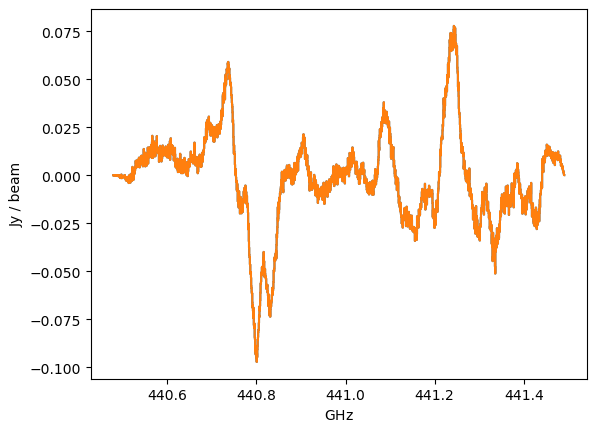

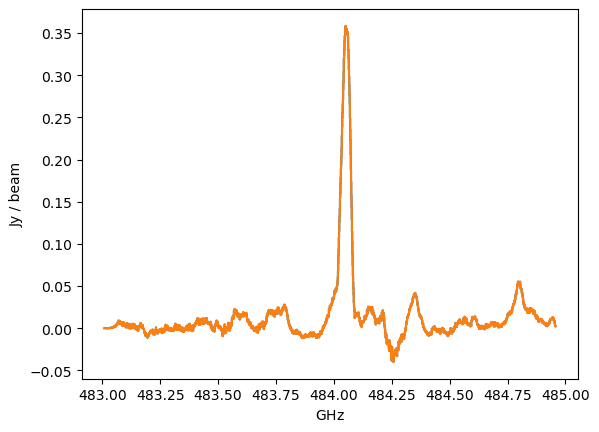

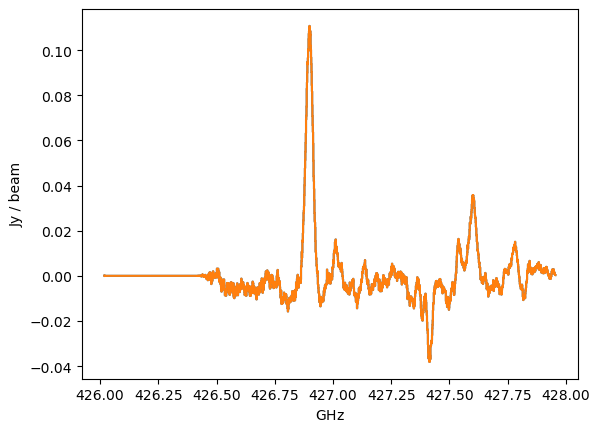

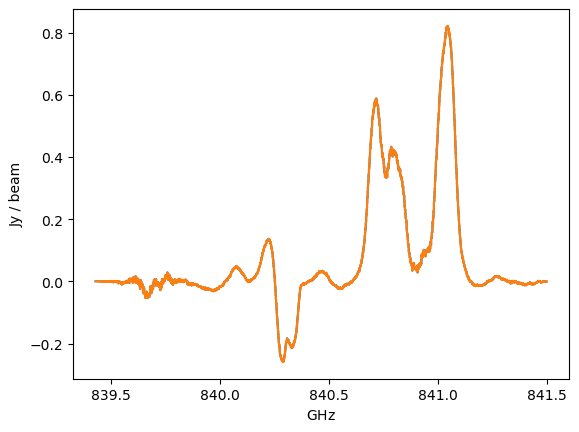

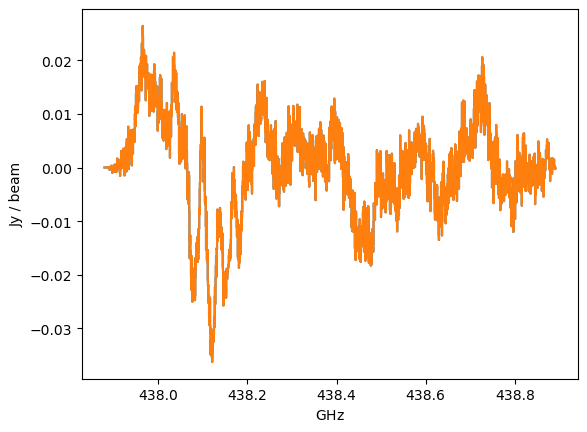

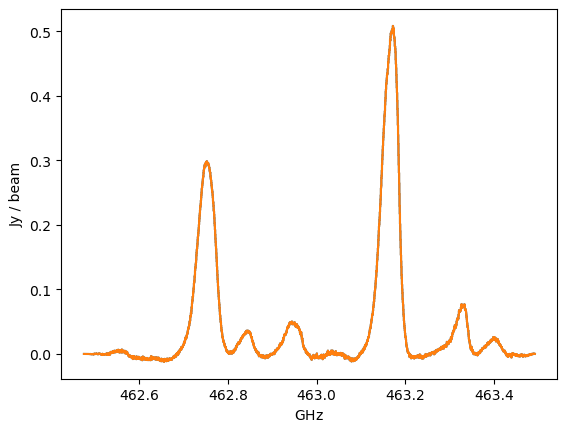

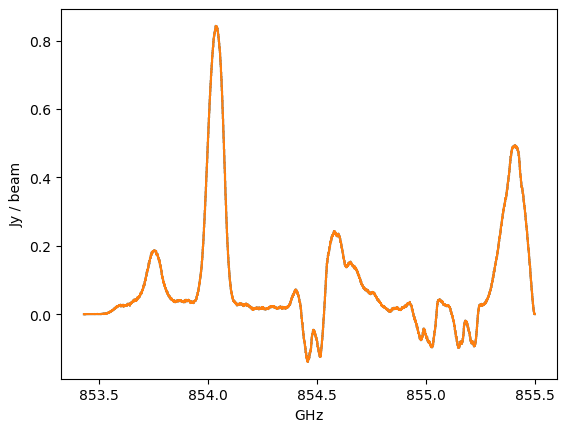

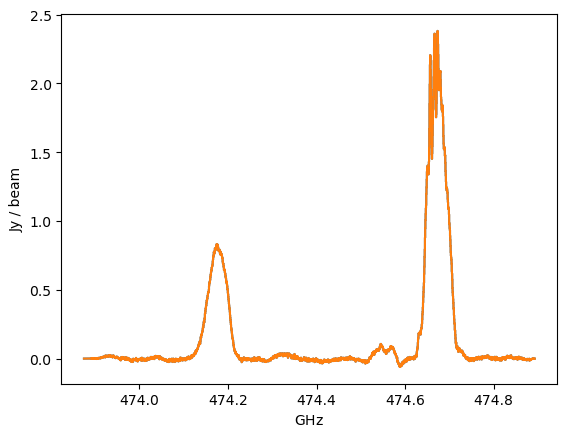

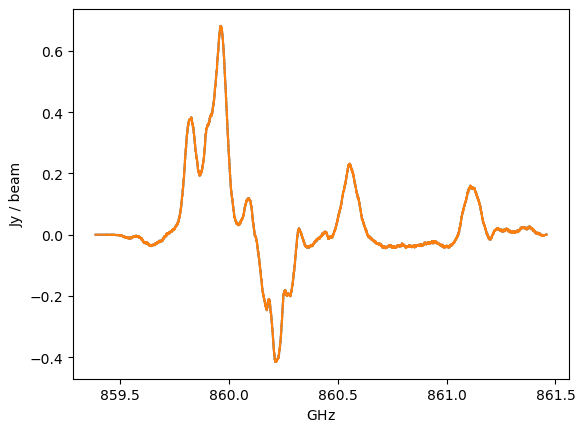

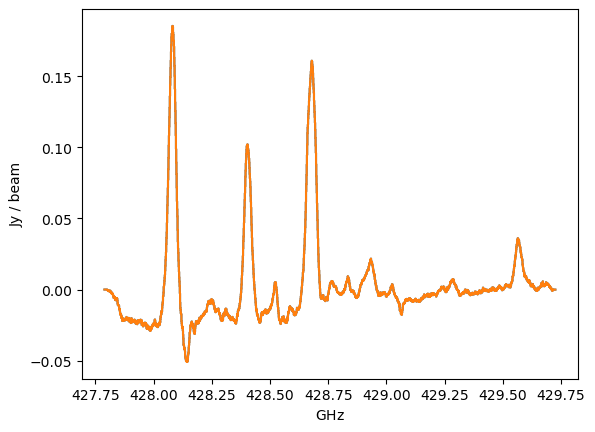

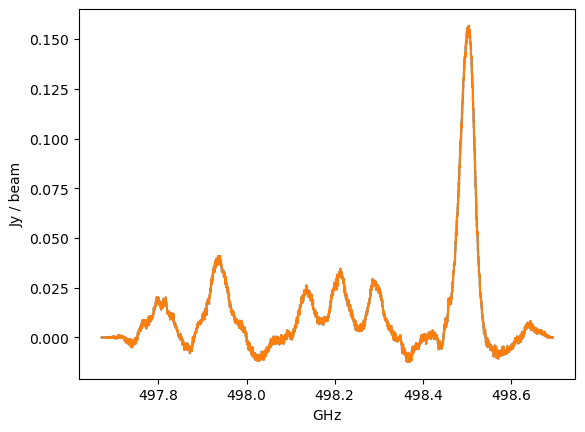

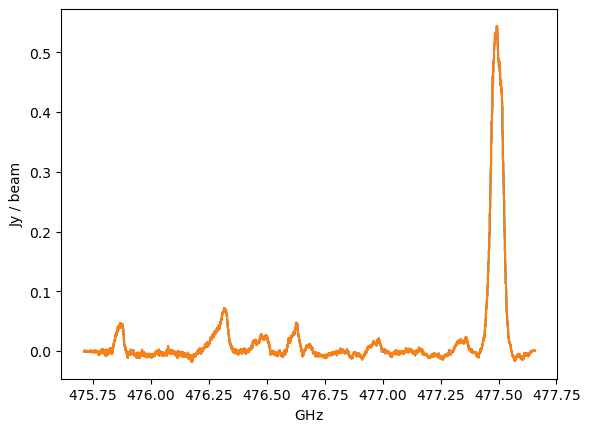

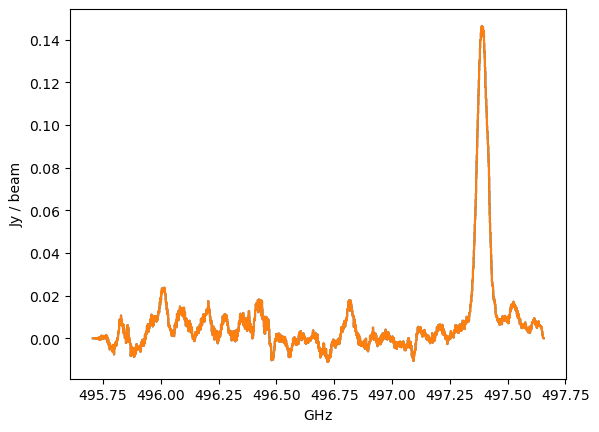

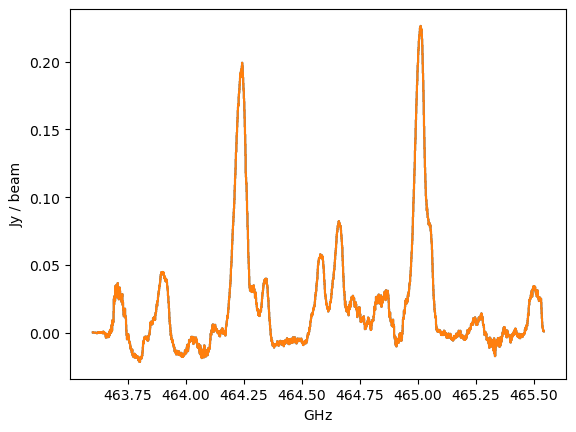

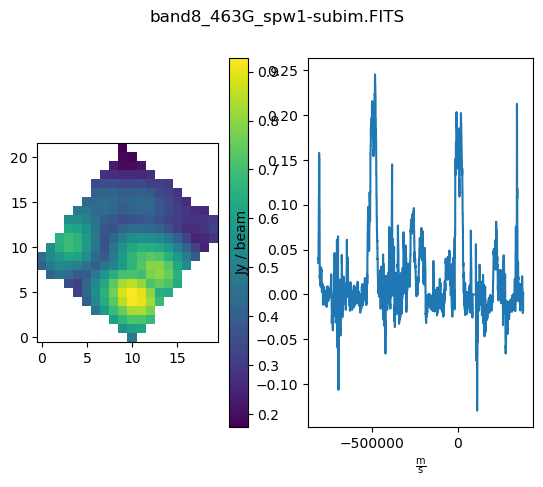

In [12]:


flist = [x for x in glob.glob('*.FITS') if 'spectra' not in x]
for fn in flist:
    basename = os.path.split(fn)[-1].split(".FITS")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True)
    except Exception as ex:
        print(ex)
        continue
    print(cube)
    scube = cube.subcube_from_regions(regions.Regions.read('b8_saltdisk.reg'))
    mx = scube.max(axis=0)
    #msk = mx > 0.003*mx.unit
    sp = scube.mean(axis=(1,2))
    
    sp.write(f'spectra/{fn.split("/")[-1].replace(".fits","_meanspec.fits")}', overwrite=True)

    # convert the cube to velocity units with an arbitrary reference point
    # (this step assumes the cube is in frequency or wavelength; if the
    # cube is not, it should be skipped)
    if not cube.spectral_axis.unit.is_equivalent(u.km/u.s):
        fullcube = cube.with_spectral_unit(u.km/u.s,
                                           velocity_convention='radio',
                                           rest_value=cube.spectral_axis.mean())
    else:
        fullcube = cube

    # mask out super bright SiO masers; they break the FFT shifting tool
    # (this step can be skipped if there's nothing anomalously bright
    # in your spectrum)
    # fullcube = fullcube.with_mask(fullcube < 0.5*u.Jy/u.beam)


    scube = fullcube.subcube_from_regions(regions.Regions.read('b8_saltdisk.reg'))

    # reproject the velocity map into the cube's coordinate system
    vmap_proj,_ = reproject.reproject_interp(vmap.hdu,
                                             scube.wcs.celestial,
                                             shape_out=scube.shape[1:])
    vmap_proj = u.Quantity(vmap_proj, u.km/u.s)


    # perform the stacking!
    stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                           v0=0.0*u.km/u.s)
    fstack = stack.with_spectral_unit(u.GHz)

    pl.suptitle(f"{fn}")
    fstack.write(f'spectra/SrcI{basename}_stack.fits', overwrite=True)

    pl.clf()
    fstack.quicklook(filename=f'spectra/figures/{basename}_SrcI_stack.pdf')
    fstack.quicklook(filename=f'spectra/figures/{basename}_SrcI_stack.png')

    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

In [13]:
cat b8_saltdisk.crtf

#CRTFv0 CASA Region Text Format version 0
rotbox [[05:35:14.51777, -005.22.30.5847], [0.2821arcsec, 0.3231arcsec], 322.47869873deg] coord=J2000, corr=[I], linewidth=1, linestyle=-, symsize=1, symthick=1, color=green, font=Helvetica, fontsize=10, fontstyle=bold, usetex=false


In [14]:
regions.Regions.read('b8_saltdisk.crtf')

<Regions([<RectangleSkyRegion(center=<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (5.58736605, -5.37516242)>, width=0.2821 arcsec, height=0.3231 arcsec, angle=322.47869873 deg)>])>

In [15]:
regions.Regions.read('b8_saltdisk.reg')

<Regions([<RectangleSkyRegion(center=<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (83.810491, -5.375162)>, width=0.2821 arcsec, height=0.3231 arcsec, angle=322.4787 deg)>])>

In [16]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue import Splatalogue
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

In [17]:
from astropy import units as u

In [18]:
known_lines = {'SO11(10)-11(9)v=1': 428.40578300*u.GHz}

spectra/SrcIband10_850G_spw0-subim_stack.fits
spectra/SrcIband8_438G_spw1-subim_stack.fits
spectra/SrcIband10_850G_spw3-subim_stack.fits
spectra/SrcIband8_438G_spw3-subim_stack.fits
spectra/SrcIband8_463G_spw3-subim_stack.fits
spectra/SrcIband8_495G_spw2-subim_stack.fits
spectra/SrcIband8_495G_spw0-subim_stack.fits
spectra/SrcIband8_463G_spw1-subim_stack.fits
spectra/SrcIband8_463G_spw0-subim_stack.fits
spectra/SrcIband8_438G_spw0-subim_stack.fits
spectra/SrcIband8_463G_spw2-subim_stack.fits
spectra/SrcIband10_850G_spw1-subim_stack.fits
spectra/SrcIband8_438G_spw2-subim_stack.fits
spectra/SrcIband8_495G_spw1-subim_stack.fits


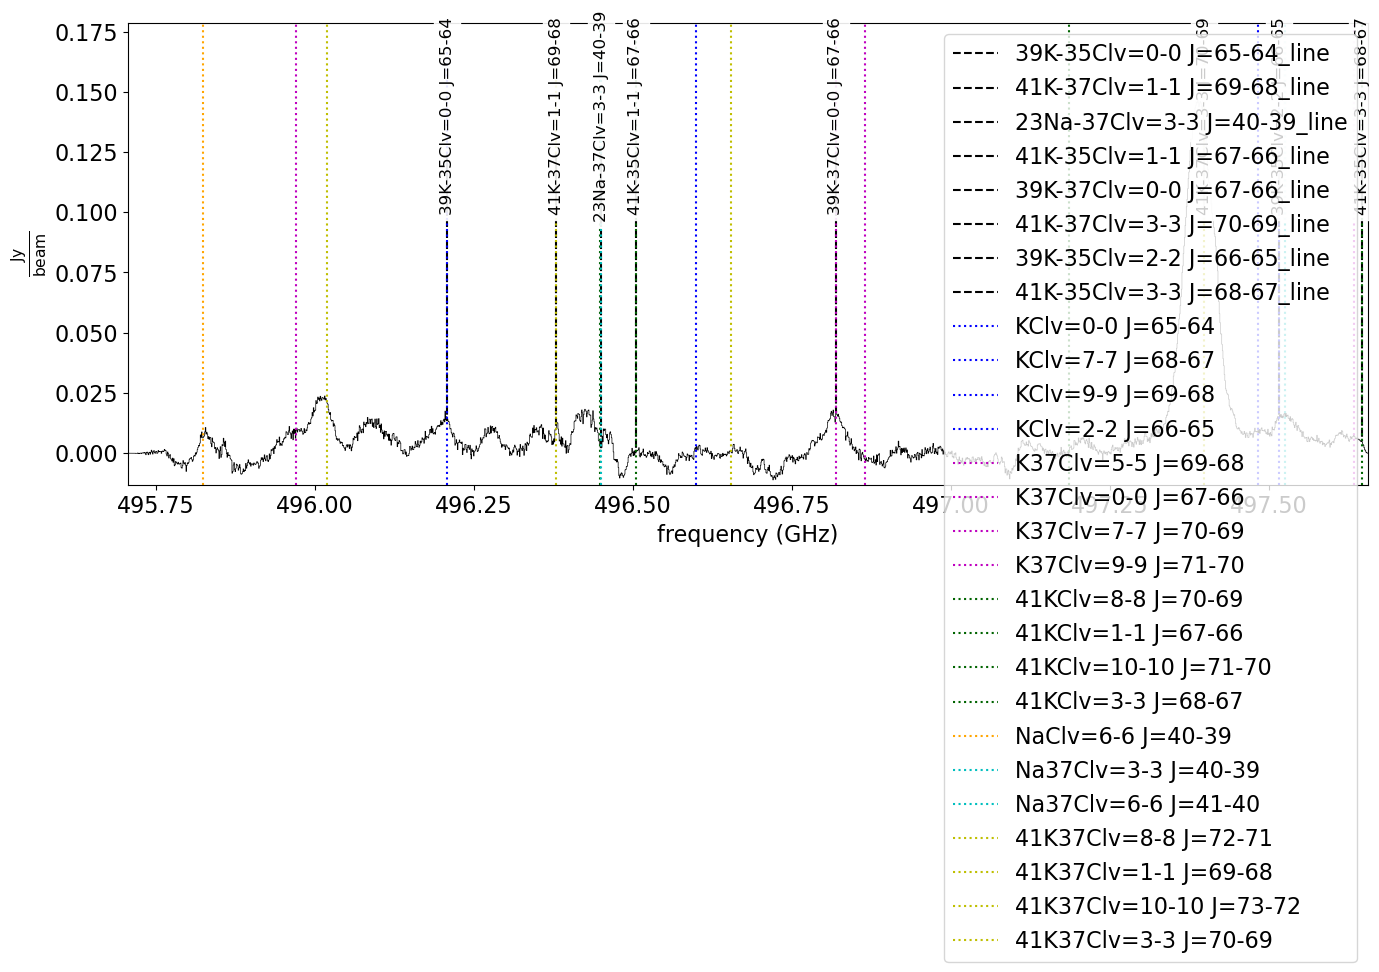

In [19]:
# (vcen in the stacked centroid is defined to be zero)
vcen = 0*u.km/u.s

pl.matplotlib.rcParams['font.size']=16

all_lines = {**lines.disk_lines, **lines.absorbers}

ided_linenames = sorted(all_lines.keys())
ided_linefreqs = u.Quantity([all_lines[x] for x in ided_linenames
                             #if 'U' not in x
                            ])
ided_linetexnames = [lines.texnames[x] if x in lines.texnames else x
                     for x in ided_linenames
                     #if 'U' not in x
                    ]

#salt_tables = [KCl, K37Cl, K41Cl, NaCl, Na37Cl, K41Cl37]
salt_colors = ['b', 'm', 'darkgreen', 'orange', 'c', 'y']

tables = salt_tables

def linename(row):
    return row['Species'] #"{0} {1}".format(row['Species'], row['QNs'])
def freq(row):
    return u.Quantity(row['Freq'], u.GHz)

linenames = [linename(row) for tbl in tables for row in tbl if row['vu'] <=4]
linetexnames = [linename(row) for tbl in tables for row in tbl if row['vu'] <=4] + ided_linetexnames
linetexnames = np.array(linetexnames)
linefreqs = np.hstack([u.Quantity([freq(row) for tbl in tables for row in tbl if row['vu'] <=4], u.GHz).value,
                       ided_linefreqs.value])
linefreqs = u.Quantity(linefreqs, u.GHz)


detection_table = table.Table.read(paths.tpath('salts_in_band.ipac'), format='ascii.ipac')
nondetections = (detection_table['Flag'] == '-n') | (detection_table['Flag'] == 'cn')
detection_table = detection_table[~nondetections]


paths.fpath = lambda x: f"spectra/figures/{x}"

flist = glob.glob('spectra/*stack*.fits')
for fn in flist:
    print(fn)

    sp_st = pyspeckit.Spectrum(fn)
    sp_st.xarr.convert_to_unit(u.GHz)
    
    pl.figure(0, figsize=(16,6)).clf()
    sp_st.plotter(figure=pl.figure(0, figsize=(16,6)), clear=True)

    basefn = os.path.split(fn)[-1]

    lines_to_plot = ((linefreqs > sp_st.xarr.as_unit(linefreqs.unit).min()*(1-vcen/constants.c)) &
                     (linefreqs < sp_st.xarr.as_unit(linefreqs.unit).max()*(1+vcen/constants.c)))
    
    sp_st.plotter()#ymin=-0.0025, ymax=0.01)
    sp_st.plotter.line_ids(linetexnames[lines_to_plot], linefreqs[lines_to_plot], velocity_offset=vcen,
                           label1_size=16,
                           auto_yloc_fraction=0.75)
    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))


    sp_st.plotter.savefig(paths.fpath('{0}'
                                      .format(basefn.replace("fits","png")))
                          )

    for obj in sp_st.plotter.axis.texts+sp_st.plotter.axis.lines:
        if 'Na' in obj.get_label():
            obj.set_color('r')
            obj.set_zorder(5)
        elif 'K' in obj.get_label():
            obj.set_color('b')
            obj.set_zorder(10)
    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))

    ylim = pl.ylim()
    if ylim[-1] < 0.2:
        pl.ylim(ylim[0], 0.2)        
        
    sp_st.plotter.savefig(paths.fpath('color_labels_{0}'
                                      .format(basefn.replace("fits","png")))
                          )


    sp_st.plotter()#ymin=-0.0025, ymax=0.01)

    # uses lines.py
    sp_st.plotter.line_ids(linetexnames[lines_to_plot], linefreqs[lines_to_plot], velocity_offset=vcen,
                           auto_yloc_fraction=0.8)

    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))
    #sp_st.plotter.line_ids(ided_linetexnames, ided_linefreqs, velocity_offset=-vcen,
    #                       plot_kwargs=dict(color='b'))
    sp_st.plotter.savefig(paths.fpath('lines_labeled_{0}'
                                      .format(basefn.replace("fits","png")))
                         )


    #sp_st.plotter(ymin=-0.0025, ymax=0.01)
    # use the salt names directly.  This is for labeling of the colored
    # lines; the publication-ready stuff still uses lines.py
    #sp_st.plotter.line_ids(detection_table['Species'],
    #                       u.Quantity(detection_table['Frequency'], u.GHz),
    #                       velocity_offset=-vcen,
    #                       auto_yloc_fraction=0.8)

    for tbl,color,nm in zip(salt_tables, salt_colors, salt_table_names):
        for row in tbl:
            frq = u.Quantity(row['Freq'], u.GHz)
            if frq > sp_st.xarr.min() and frq < sp_st.xarr.max():
                #print(row)
                sp_st.plotter.axis.axvline((frq*(1-vcen/constants.c)).to(u.GHz).value,
                                          #-0.05, 0.10,
                                          color=color, linestyle=':', label=nm+row['QNs'])

    pl.legend(loc='upper right')

    sp_st.plotter.savefig(paths.fpath('diagnostic_lines_labeled_{0}'
                                      .format(basefn.replace("fits","png")))
                         )

In [20]:
# use this to look up line frequencies
salt_tables[3][salt_tables[3]['Ju'] == 33]

Iso,Ju,Jl,vu,vl,nuCalc,e_nuCalc,x_nuCalc,E_U,Aij,Freq,gu,gl,E_L,QNs,Species
,,,,,,,,K,1 / s,GHz,,,,,
str2,int16,int16,uint8,uint8,float64,float64,str9,float64,float32,float64,int16,int16,float64,str15,str24
35,33,32,8,8,403559.29800,0.064000,MHz,4348.70,0.03,403.559298,1072,1040,4329.33220834381,v=8-8 J=33-32,23Na-35Clv=8-8 J=33-32
35,33,32,7,7,406607.74700,0.036000,MHz,3865.80,0.03,406.60774699999996,1072,1040,3846.285905866332,v=7-7 J=33-32,23Na-35Clv=7-7 J=33-32
35,33,32,6,6,409676.59300,0.018000,MHz,3378.10,0.04,409.676593,1072,1040,3358.438624487245,v=6-6 J=33-32,23Na-35Clv=6-6 J=33-32
35,33,32,5,5,412765.84500,0.009000,MHz,2885.60,0.04,412.76584499999996,1072,1040,2865.790363774616,v=5-5 J=33-32,23Na-35Clv=5-5 J=33-32
35,33,32,4,4,415875.51300,0.006000,MHz,2388.40,0.04,415.875513,1072,1040,2368.4411232485213,v=4-4 J=33-32,23Na-35Clv=4-4 J=33-32
35,33,32,3,3,419005.60700,0.005000,MHz,1886.30,0.04,419.00560700000005,1072,1040,1866.1909024290364,v=3-3 J=33-32,23Na-35Clv=3-3 J=33-32
35,33,32,2,2,422156.13700,0.004000,MHz,1379.20,0.04,422.156137,1072,1040,1358.939700836237,v=2-2 J=33-32,23Na-35Clv=2-2 J=33-32
35,33,32,1,1,425327.11400,0.004000,MHz,867.20,0.04,425.327114,1072,1040,846.7875179422066,v=1-1 J=33-32,23Na-35Clv=1-1 J=33-32


In [21]:
cube = SpectralCube.read('band8_438G_spw3-subim.FITS').with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=428518.54700*u.MHz).spectral_slab(-20*u.km/u.s, 35*u.km/u.s)

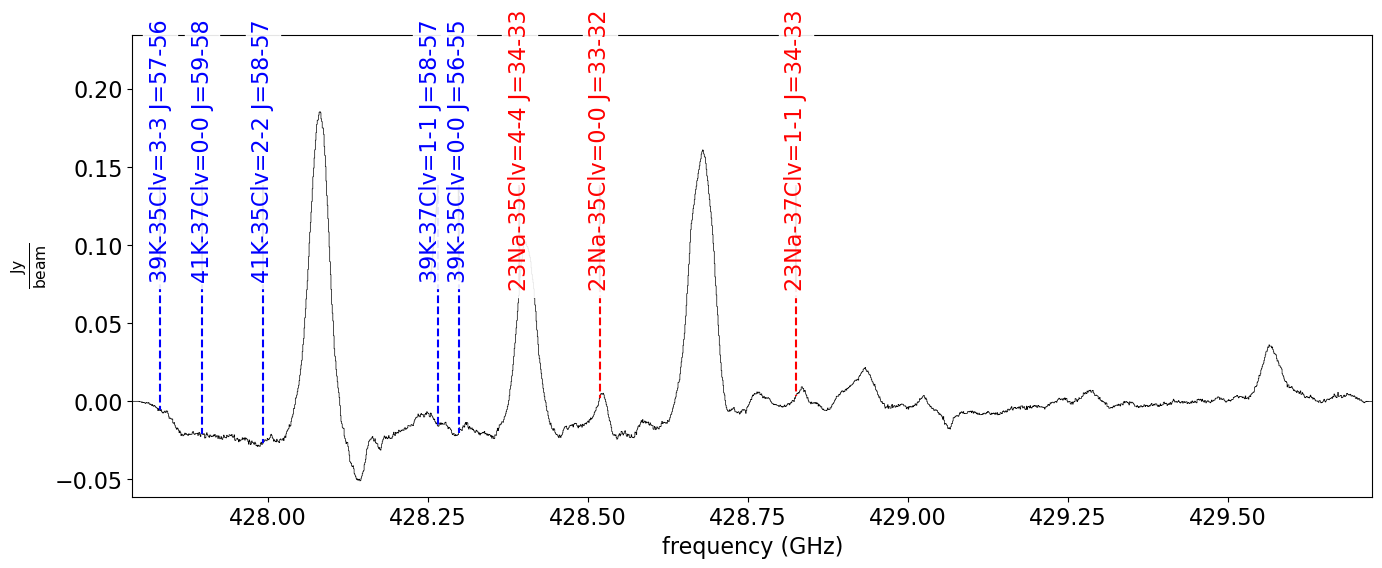

In [24]:
from IPython.display import Image
Image("spectra/figures/color_labels_SrcIband8_438G_spw3-subim_stack.png")

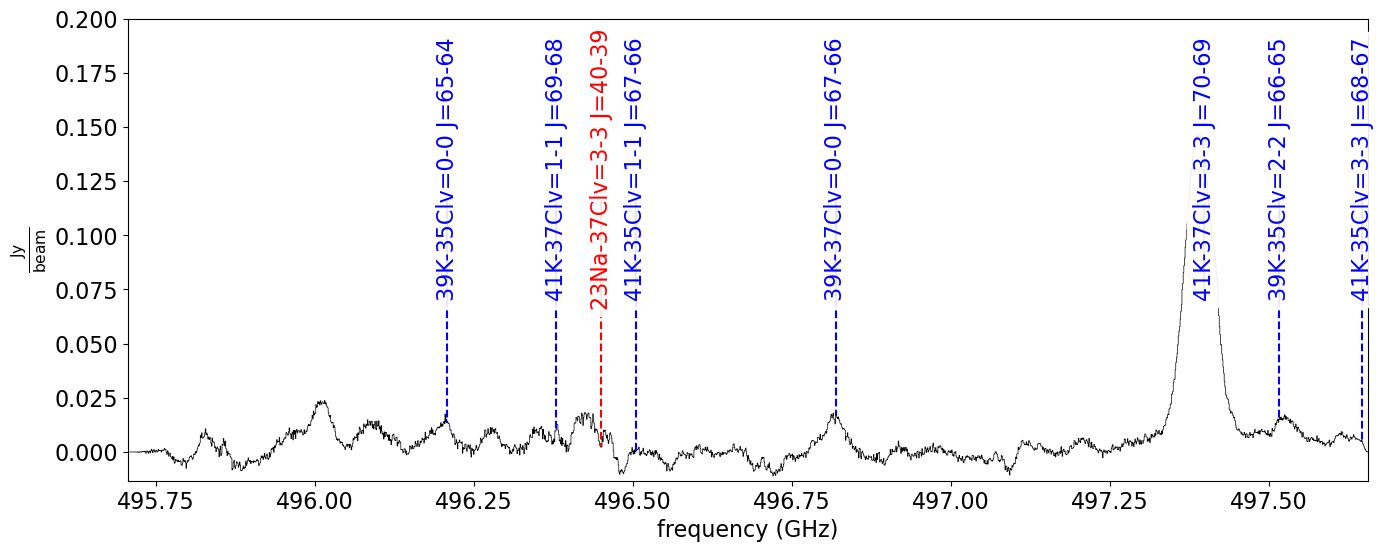

In [25]:
from IPython.display import Image
Image("spectra/figures/color_labels_SrcIband8_495G_spw1-subim_stack.png")